In [1]:
from scipy.stats import skew
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('flight.csv')

- Dataset ini berisikan tentang informasi member sebuah program Frequent Flyer dari suatu maskapai.
- Setiap Row/Baris dari dataset ini mewakili tiap-tiap member yang ada di Frequent Flyer Program ini.

| Code | Description |
| ----- | ----------|
| MEMBER_NO-b | ID Member |
| FFP_DATE | Frequent Flyer Program Join Date |
| FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama |
| GENDER  | Jenis Kelamin |
| FFP_TIER | Tier dari Frequent Flyer Program |
| WORK_CITY  | Kota Asal |
| WORK_PROVINCE  | Provinsi Asal |
| WORK_COUNTRY  | Negara Asal |
| AGE  | Umur Customer |
| LOAD_TIME  | Tanggal data diambil  |
| FLIGHT_COUNT  | Jumlah penerbangan Customer |
| BP_SUM | Rencana Perjalanan |
| SUM_YR_1  | Fare Revenue |
| SUM_YR_2  | Votes Prices |
| SEG_KM_SUM | Total jarak(km) penerbangan yg sudah dilakukan |
| LAST_FLIGHT_DATE | Tanggal penerbangan terakhir |
| LAST_TO_END   | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir |
| AVG_INTERVAL  | Rata-rata jarak waktu |
| MAX_INTERVAL  | Maksimal jarak waktu |
| EXCHANGE_COUNT | Jumlah penukaran |
| avg_discount  | Rata rata discount yang didapat customer |
| Points_Sum  | Jumlah poin yang didapat customer |
| Point_NotFlight  | point yang tidak digunakan oleh members |


In [3]:
df.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [4]:
df.shape

(62988, 23)

In [5]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [7]:
df.duplicated().sum()

0

In [8]:
categorical = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
numerical = ['FFP_TIER','AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
print(f'Categorical Data: {categorical}')
print(f'Numerical Data: {numerical}')

Categorical Data: ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Numerical Data: ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']


In [9]:
df[numerical].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [10]:
df[categorical].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


## Cleanup & Missing Values

In [11]:
new_df = df.copy()

In [12]:
new_df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Fitur-fitur ini (`WORK_COUNTRY`, `AGE` , `SUM_YR_1`, `SUM_YR_2`, `GENDER`) hanya hilang dengan porsi yang sangat kecil, maka akan kita drop.

In [13]:
missing = new_df[['WORK_COUNTRY','AGE','SUM_YR_1','SUM_YR_2','GENDER']]
for i in missing:
    new_df.dropna(subset=[i], inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61856 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          61856 non-null  int64  
 1   FFP_DATE           61856 non-null  object 
 2   FIRST_FLIGHT_DATE  61856 non-null  object 
 3   GENDER             61856 non-null  object 
 4   FFP_TIER           61856 non-null  int64  
 5   WORK_CITY          59701 non-null  object 
 6   WORK_PROVINCE      58747 non-null  object 
 7   WORK_COUNTRY       61856 non-null  object 
 8   AGE                61856 non-null  float64
 9   LOAD_TIME          61856 non-null  object 
 10  FLIGHT_COUNT       61856 non-null  int64  
 11  BP_SUM             61856 non-null  int64  
 12  SUM_YR_1           61856 non-null  float64
 13  SUM_YR_2           61856 non-null  float64
 14  SEG_KM_SUM         61856 non-null  int64  
 15  LAST_FLIGHT_DATE   61856 non-null  object 
 16  LAST_TO_END        618

In [14]:
new_df[['WORK_CITY', 'WORK_PROVINCE']].mode()

,WORK_CITY,WORK_PROVINCE
0,guangzhou,guangdong


- Kita akan mengimpute nilai yang missing dengan modus dari data tersebut.

In [15]:
new_df['WORK_CITY'].fillna(new_df['WORK_CITY'].mode()[0], inplace=True)
new_df['WORK_PROVINCE'].fillna(new_df['WORK_PROVINCE'].mode()[0], inplace=True)

In [16]:
#rubah date type
new_df['FFP_DATE'] = pd.to_datetime(new_df['FFP_DATE'])
new_df['FIRST_FLIGHT_DATE'] = pd.to_datetime(new_df['FIRST_FLIGHT_DATE'])
new_df['LOAD_TIME'] = pd.to_datetime(new_df['LOAD_TIME'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61856 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61856 non-null  int64         
 1   FFP_DATE           61856 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61856 non-null  datetime64[ns]
 3   GENDER             61856 non-null  object        
 4   FFP_TIER           61856 non-null  int64         
 5   WORK_CITY          61856 non-null  object        
 6   WORK_PROVINCE      61856 non-null  object        
 7   WORK_COUNTRY       61856 non-null  object        
 8   AGE                61856 non-null  float64       
 9   LOAD_TIME          61856 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61856 non-null  int64         
 11  BP_SUM             61856 non-null  int64         
 12  SUM_YR_1           61856 non-null  float64       
 13  SUM_YR_2           61856 non-null  float64       
 14  SEG_KM

In [23]:
new_df[new_df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,2007-06-17,2007-06-17,Female,6,guangzhou,guangdong,CN,46.0,2014-03-31,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,2009-08-26,2010-04-29,Male,5,haerbin,heilongjiang,CN,70.0,2014-03-31,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,2006-11-10,2007-01-26,Male,5,.,beijing,CN,39.0,2014-03-31,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,2005-07-13,2005-08-06,Male,5,guangzhou,guangdong,CN,40.0,2014-03-31,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,2006-05-24,2007-04-21,Male,5,wuhan,hubei,CN,50.0,2014-03-31,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,2013-01-11,2013-07-10,Male,4,dalianshi,liaoning,CN,23.0,2014-03-31,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,2009-07-26,2009-07-26,Male,4,tianjin,tianjin,CN,37.0,2014-03-31,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,2011-04-11,2011-04-20,Male,4,guangzhou,guangdong,CN,34.0,2014-03-31,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,2007-10-31,2008-03-13,Male,4,foshan,guangdong,CN,42.0,2014-03-31,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [25]:
new_df.drop(new_df[new_df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61437 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61437 non-null  int64         
 1   FFP_DATE           61437 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61437 non-null  datetime64[ns]
 3   GENDER             61437 non-null  object        
 4   FFP_TIER           61437 non-null  int64         
 5   WORK_CITY          61437 non-null  object        
 6   WORK_PROVINCE      61437 non-null  object        
 7   WORK_COUNTRY       61437 non-null  object        
 8   AGE                61437 non-null  float64       
 9   LOAD_TIME          61437 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61437 non-null  int64         
 11  BP_SUM             61437 non-null  int64         
 12  SUM_YR_1           61437 non-null  float64       
 13  SUM_YR_2           61437 non-null  float64       
 14  SEG_KM

In [26]:
new_df[numerical].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000
mean,4.103260,42.496281,11.939776,11023.455312,5371.931577,5647.021518,17276.042710,173.565880,68.182230,167.320198,0.323730,0.721644,12660.916500,2.757947
std,0.375856,9.888107,14.118982,16407.296822,8131.393893,8707.188825,21054.585569,181.477696,77.774203,123.150092,1.145186,0.184845,20614.743676,7.403055
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,35.000000,3.000000,2584.000000,1020.000000,820.000000,4849.000000,28.000000,23.714286,81.000000,0.000000,0.612500,2838.000000,0.000000
50%,4.000000,41.000000,7.000000,5780.000000,2811.000000,2808.000000,10149.000000,107.000000,45.000000,144.000000,0.000000,0.711781,6420.000000,0.000000
75%,4.000000,48.000000,15.000000,12942.000000,6590.000000,6890.000000,21431.000000,262.000000,82.500000,229.000000,0.000000,0.808987,14425.000000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


- Ada member dengan umur 110.
- Ada penerbangan dengan harga tiket 0.

In [27]:
new_df[new_df.AGE == 110]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
23268,20264,2005-04-14,2005-05-18,Female,4,shenzhenshi,guangdong,CN,110.0,2014-03-31,...,2888.0,14053,4/6/2013,361,50.333333,214,1,0.740881,11194,3


In [28]:
new_df.drop(new_df[new_df.AGE == 110].index, inplace=True)

In [29]:
new_df[categorical].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,61436,61436,61436,61436,61436,61436,61436,61436
unique,3067,3404,2,3189,1149,117,1,730
top,2011-01-13 00:00:00,2013-02-16 00:00:00,Male,guangzhou,guangdong,CN,2014-03-31 00:00:00,3/31/2014
freq,182,92,46972,11406,20330,56332,61436,956
first,2004-11-01 00:00:00,1905-12-31 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,NaN
last,2013-03-31 00:00:00,2015-05-30 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,NaN


- Ada beberapa member yang tanggal penerbangan pertamanya di tahun 1905. (Tidak Mungkin)

In [30]:
new_df[new_df.FIRST_FLIGHT_DATE == '1905-12-31']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
4455,41193,2011-02-27,1905-12-31,Male,4,dalian,liaoning,CN,35.0,2014-03-31,...,22244.0,52763,3/14/2014,18,18.051282,92,1,0.688062,33588,27
30099,1999,2004-11-10,1905-12-31,Female,4,guangzhoushi,guangdongsheng,CN,37.0,2014-03-31,...,1907.0,9592,11/19/2013,134,75.000000,178,1,0.775909,26192,38


In [31]:
new_df.drop(new_df[new_df.FIRST_FLIGHT_DATE == '1905-12-31'].index, inplace = True)

In [32]:
new_df.drop(columns=('MEMBER_NO'),inplace=True)

# EDA

## Univariate

In [33]:
new_df[numerical].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61434 entries, 0 to 62986
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FFP_TIER         61434 non-null  int64  
 1   AGE              61434 non-null  float64
 2   FLIGHT_COUNT     61434 non-null  int64  
 3   BP_SUM           61434 non-null  int64  
 4   SUM_YR_1         61434 non-null  float64
 5   SUM_YR_2         61434 non-null  float64
 6   SEG_KM_SUM       61434 non-null  int64  
 7   LAST_TO_END      61434 non-null  int64  
 8   AVG_INTERVAL     61434 non-null  float64
 9   MAX_INTERVAL     61434 non-null  int64  
 10  EXCHANGE_COUNT   61434 non-null  int64  
 11  avg_discount     61434 non-null  float64
 12  Points_Sum       61434 non-null  int64  
 13  Point_NotFlight  61434 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 7.0 MB


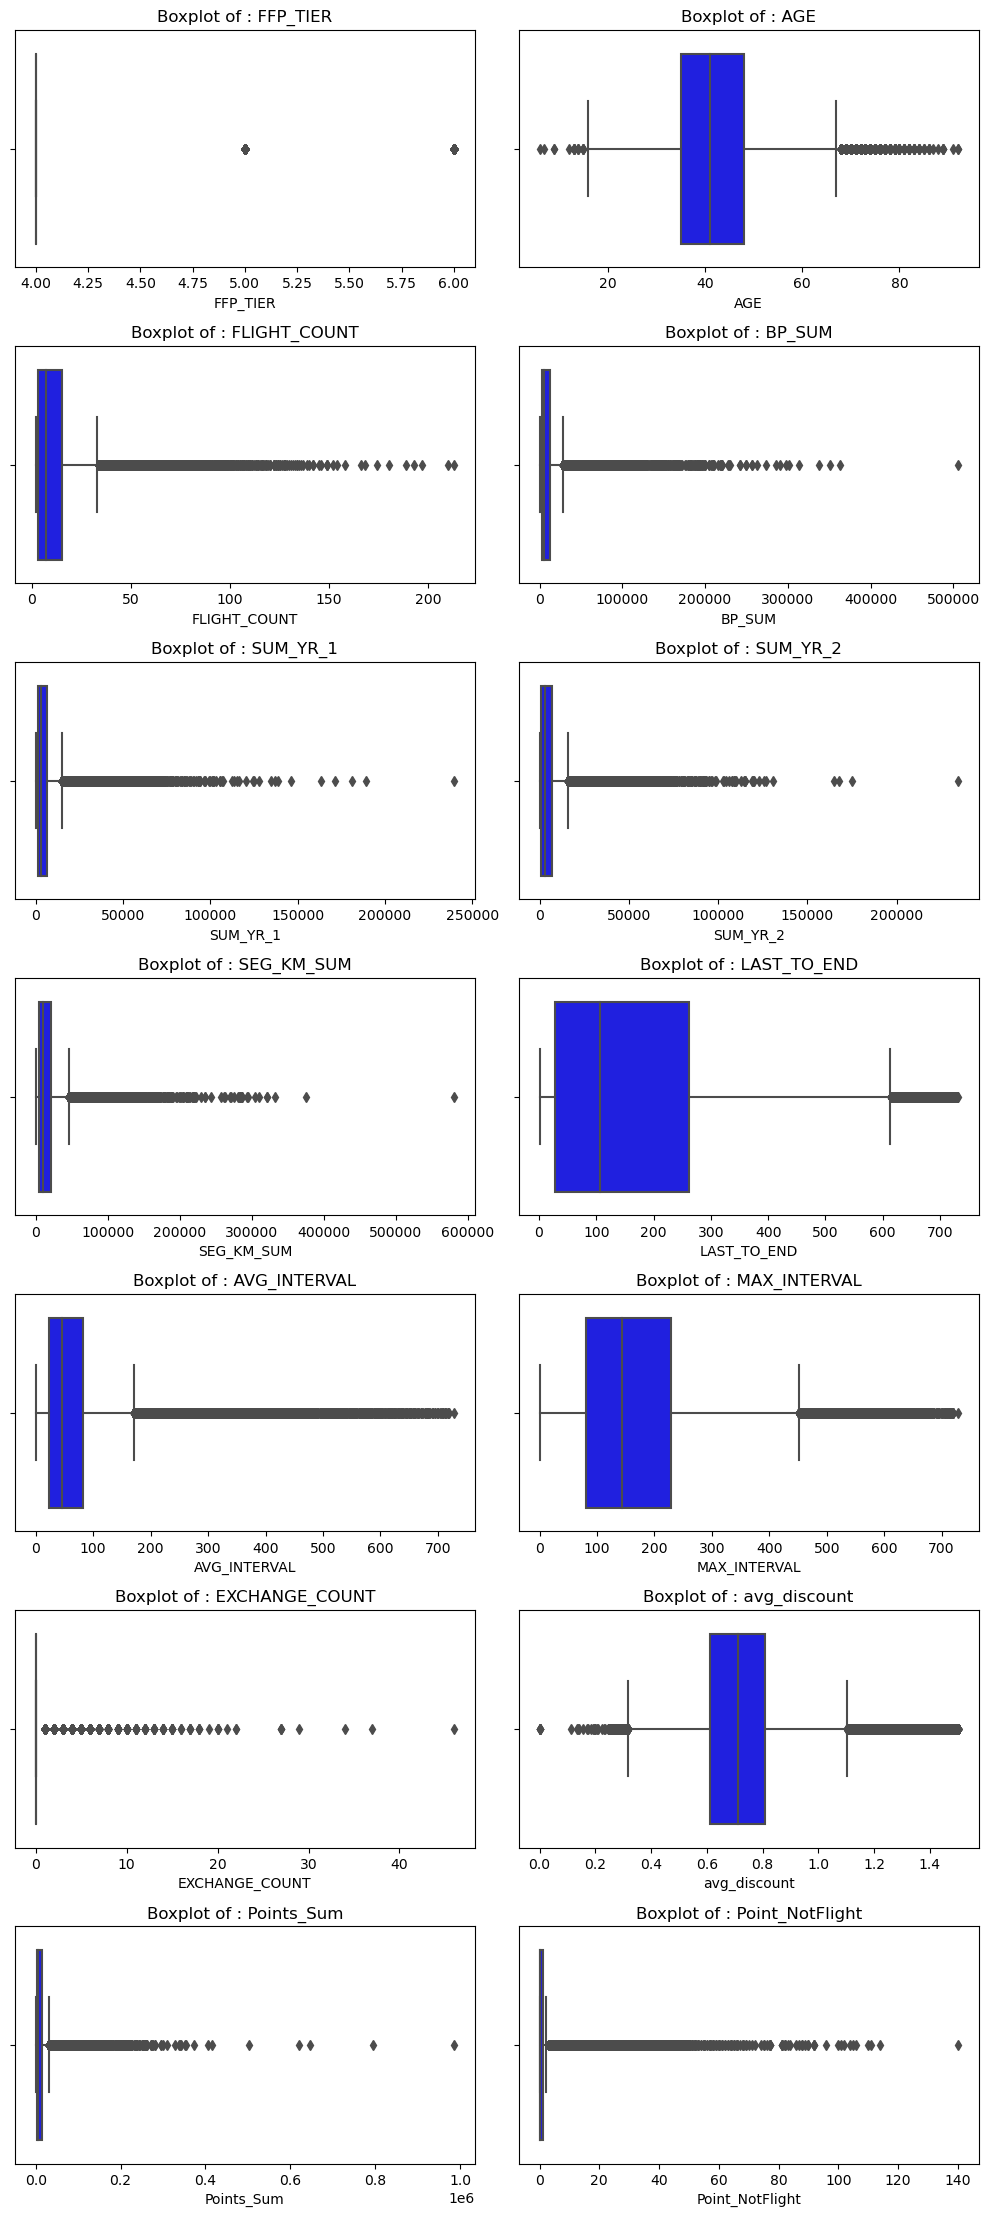

In [34]:
plt.figure(figsize=(10,25))
for i in range(0, len(numerical)):
    plt.subplot(8,2,i+1)
    sns.boxplot(x=new_df[numerical[i]],color ='b')
    title = 'Boxplot of : ' + numerical[i]
    plt.title(title)
    plt.tight_layout()
plt.show()

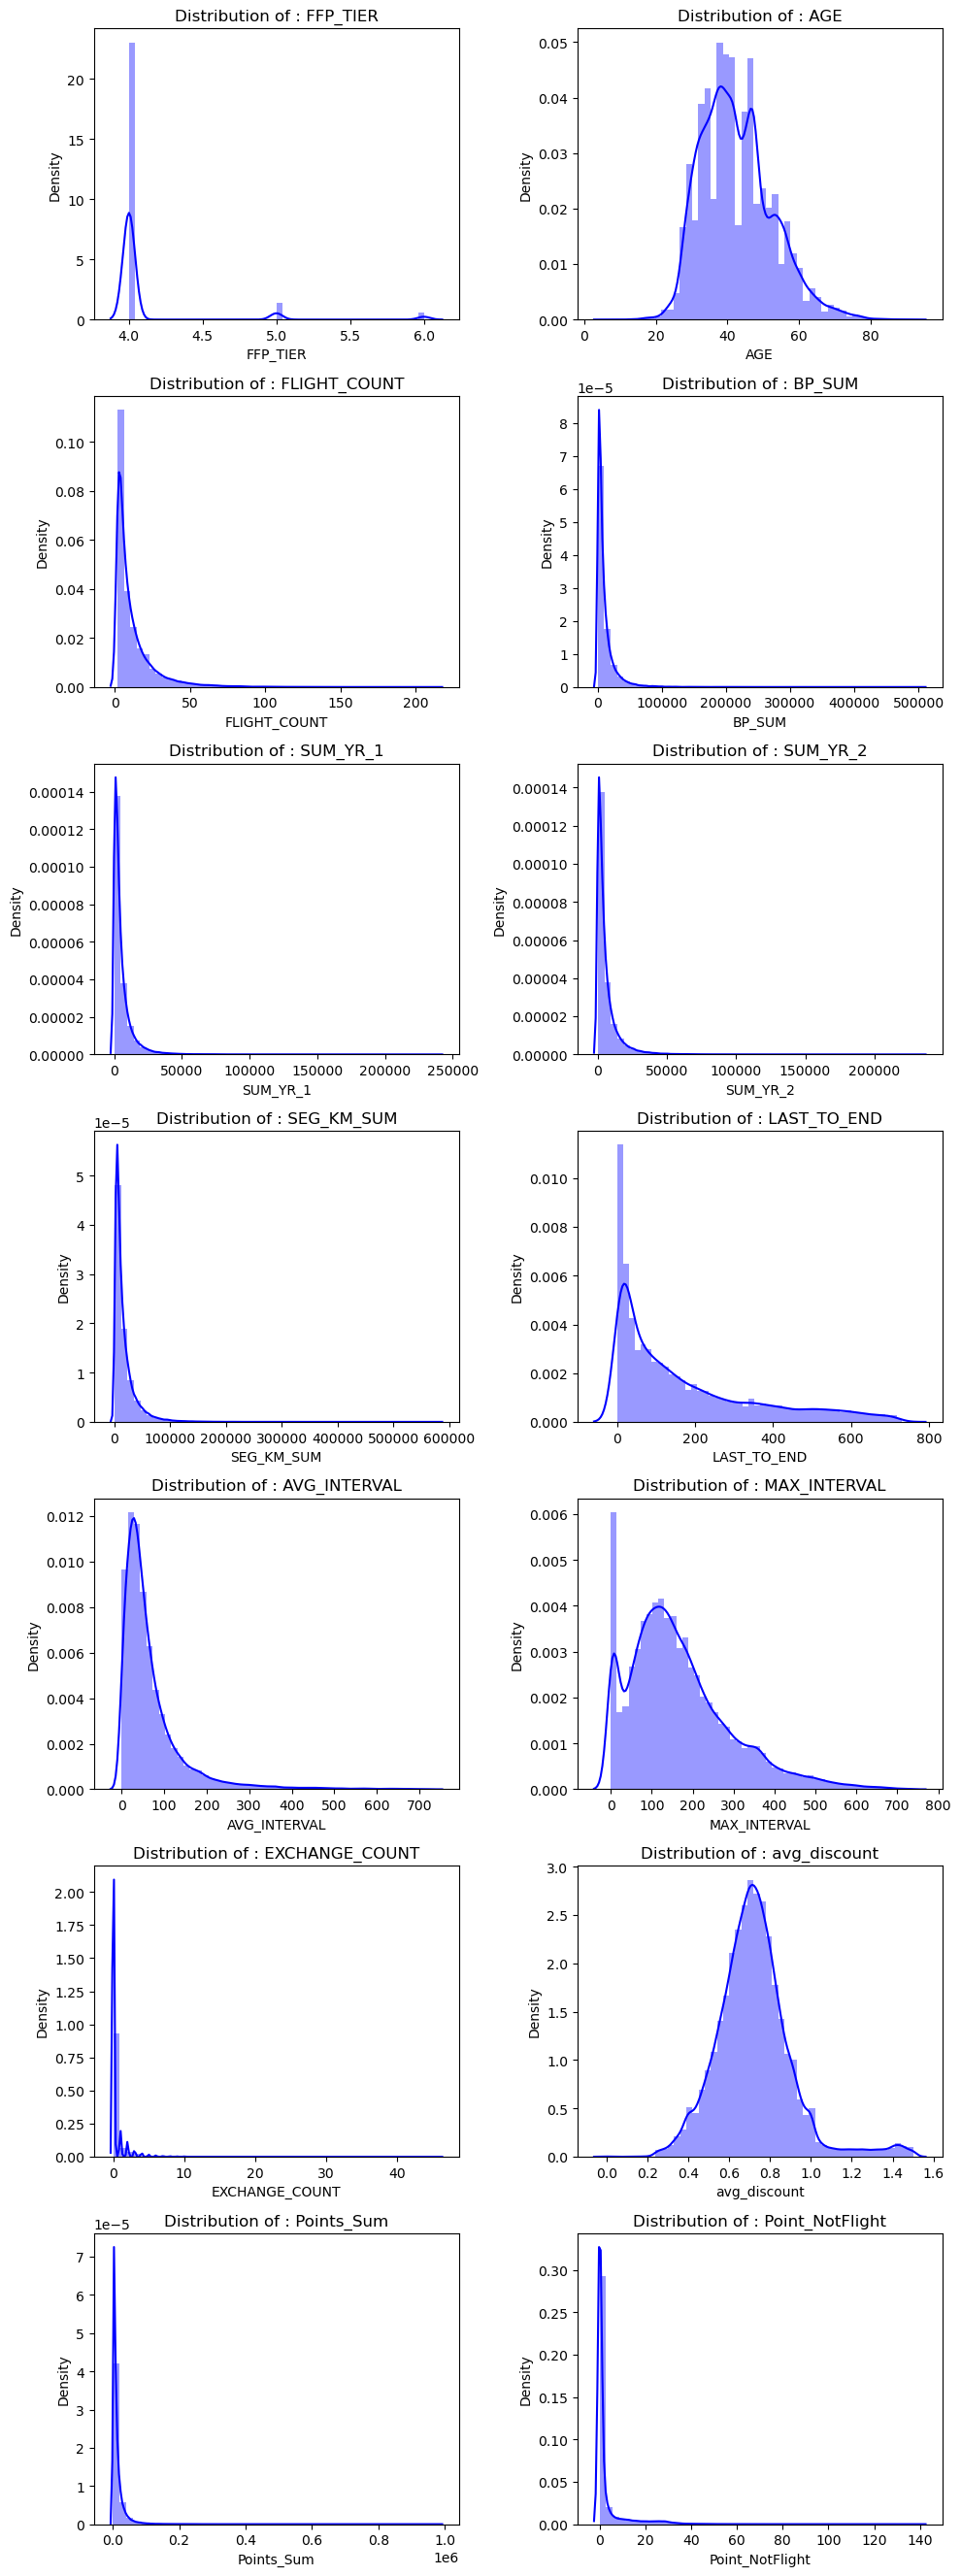

In [35]:
plt.figure(figsize=(10,30))
for i in range(0, len(numerical)):
    plt.subplot(8,2,i+1)
    sns.distplot(new_df[numerical[i]],color='b')
    title = 'Distribution of : ' + numerical[i]
    plt.title(title)
    plt.tight_layout()
plt.show()

- Berdasarkan distribusi di atas kita bisa melihat bahwa mayoritas fitur numerikal memiliki grafik skew.
- Grafik fitur `AGE` dan `avg_discount` memiliki sebaran yang normal.
- Mayoritas fitur harus dihandling datanya.

In [36]:
new_df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61434 entries, 0 to 62986
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61434 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61434 non-null  datetime64[ns]
 2   GENDER             61434 non-null  object        
 3   WORK_CITY          61434 non-null  object        
 4   WORK_PROVINCE      61434 non-null  object        
 5   WORK_COUNTRY       61434 non-null  object        
 6   LOAD_TIME          61434 non-null  datetime64[ns]
 7   LAST_FLIGHT_DATE   61434 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 4.2+ MB


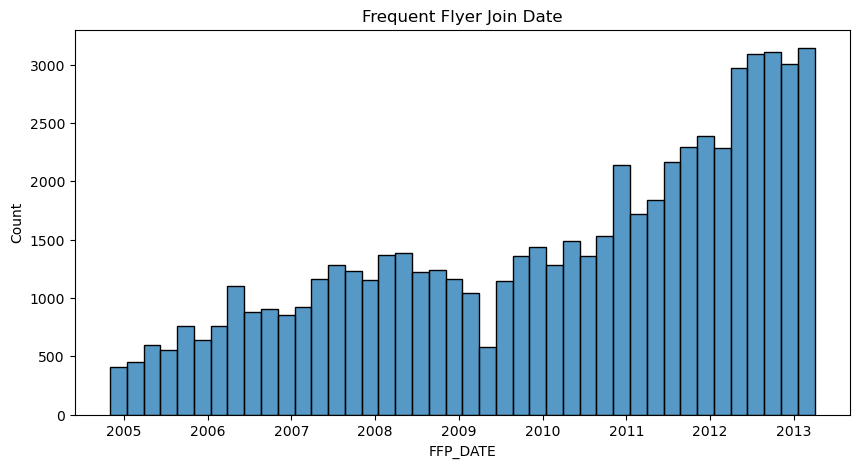

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(x='FFP_DATE', data=new_df)
plt.title('Frequent Flyer Join Date')
plt.show()

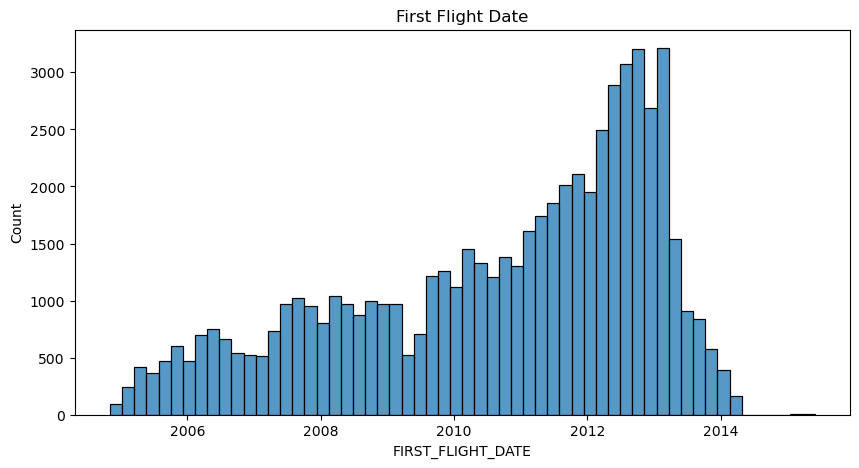

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(x='FIRST_FLIGHT_DATE', data=new_df)
plt.title('First Flight Date')
plt.show()

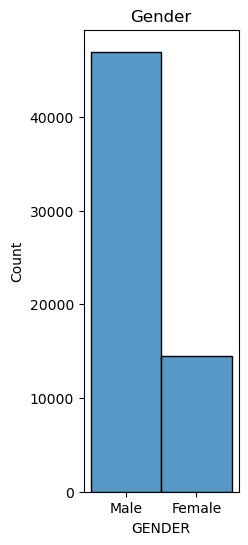

In [39]:
plt.figure(figsize=(2,6))
sns.histplot(x='GENDER', data=new_df)
plt.title('Gender')
plt.show()

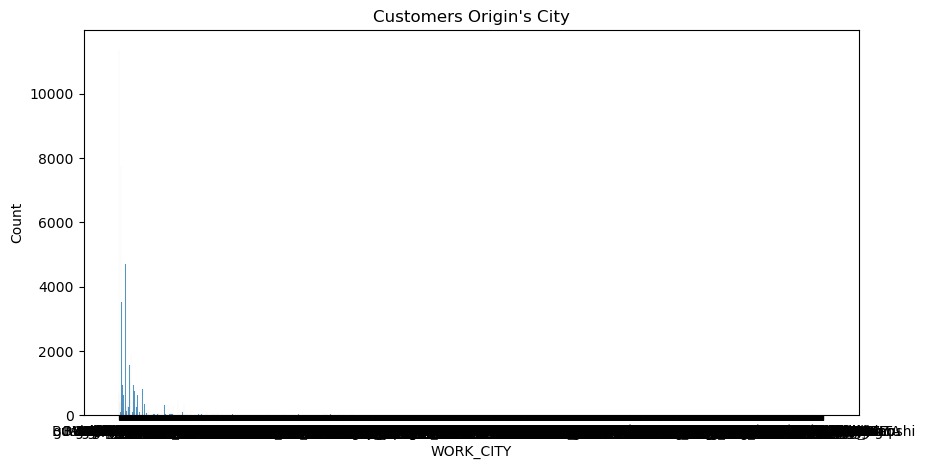

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(x='WORK_CITY', data=new_df)
plt.title("Customers Origin's City")
plt.show()

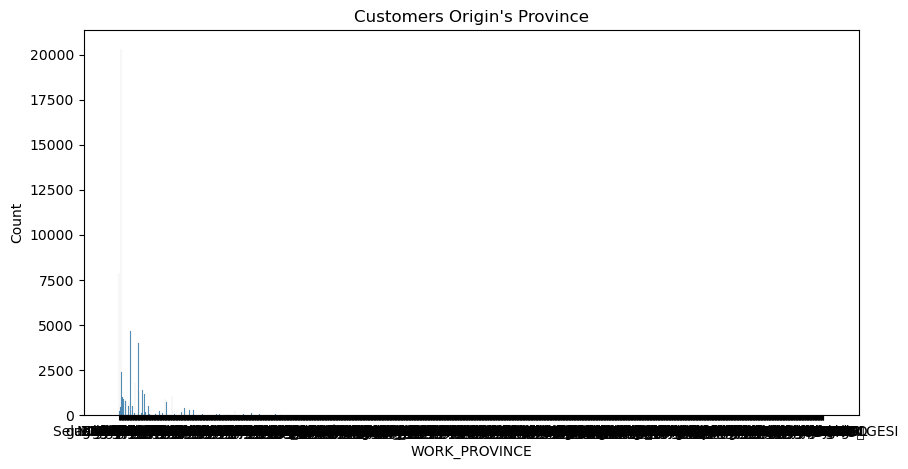

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(x='WORK_PROVINCE', data=new_df)
plt.title("Customers Origin's Province")
plt.show()

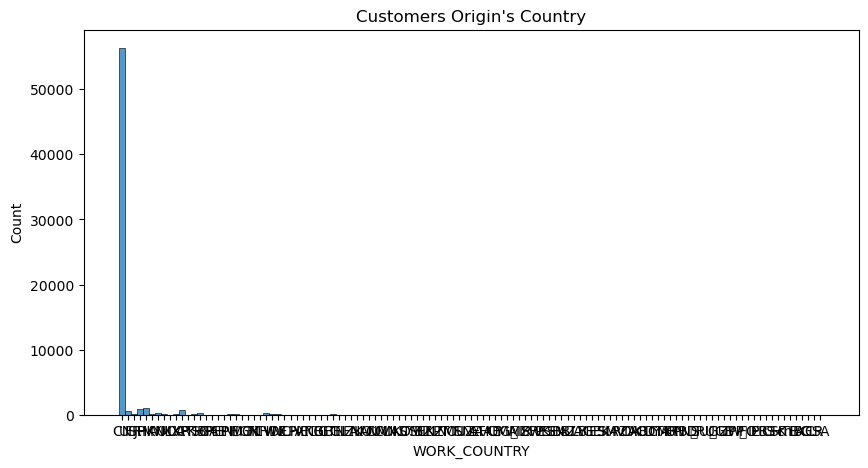

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(x='WORK_COUNTRY', data=new_df)
plt.title("Customers Origin's Country")
plt.show()

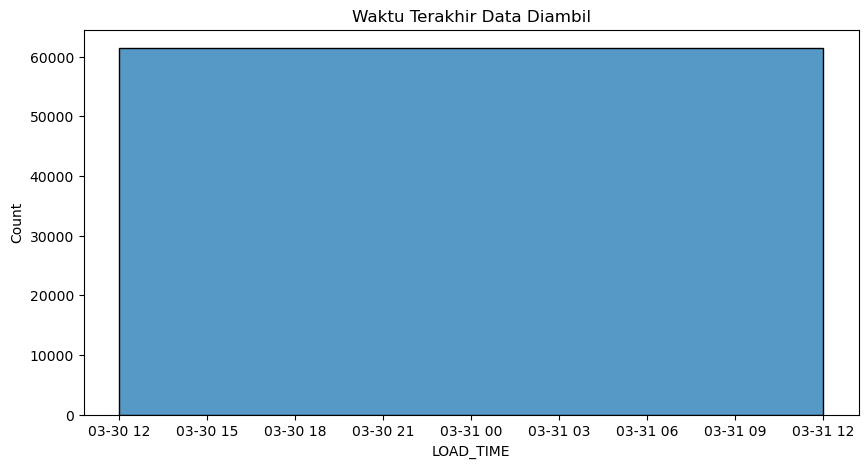

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(x='LOAD_TIME', data=new_df)
plt.title("Waktu Terakhir Data Diambil")
plt.show()

- Dari data kategorikal di atas kita mengetahui bahwa mayoritas fitur memiliki banyak unique values.
- Kebanyakan member adalah laki-laki.


## Multivariate

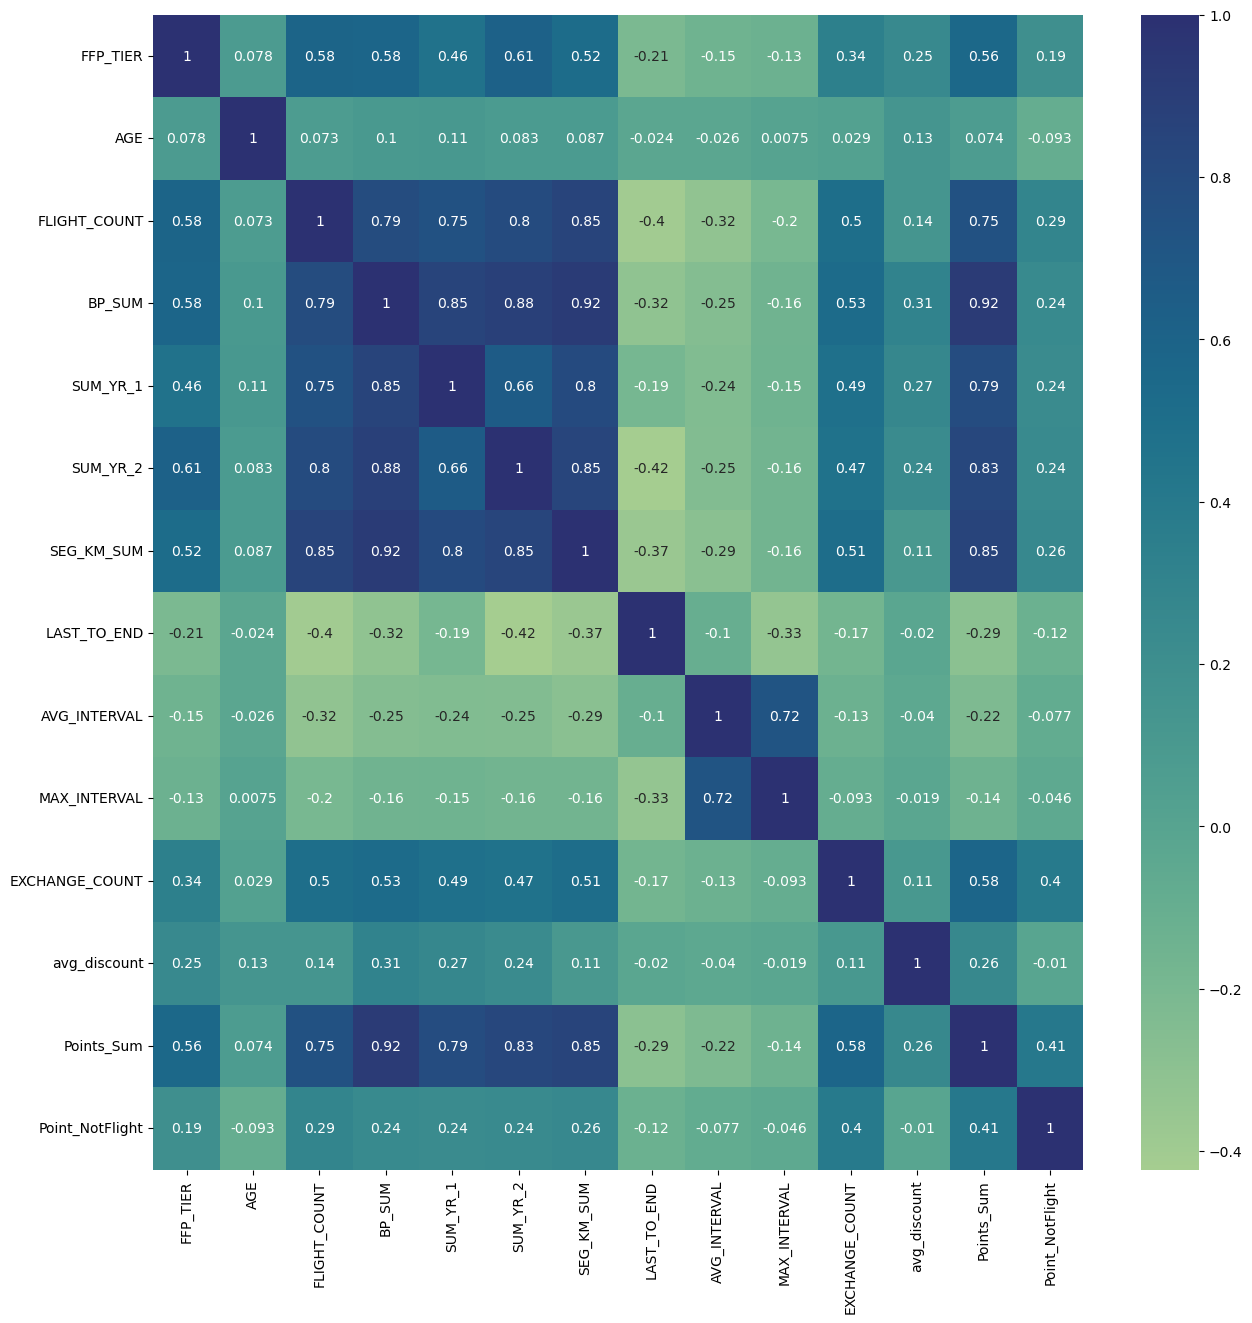

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(new_df.corr(), cmap='crest', annot=True)
plt.show()

- `FLIGHT_COUNT` berkorelasi kuat dengan `BP_SUM` = 0.79
- `FLIGHT_COUNT` berkorelasi kuat dengan `SUM_YR_1` = 0.75
- `FLIGHT_COUNT` berkorelasi kuat dengan `SUM_YR_2` = 0.79
- `FLIGHT_COUNT` berkorelasi kuat dengan `SEG_KM_SUM` = 0.85
- `POINT_SUM` berkorelasi kuat dengan `FLIGHT_COUNT` = 0.75
- `POINT_SUM` berkorelasi kuat dengan `BP_SUM` = 0.92
- `POINT_SUM` berkorelasi kuat dengan `SUM_YR_1` = 0.79
- `POINT_SUM` berkorelasi kuat dengan `SUM_YR_2` = 0.83
- `POINT_SUM` berkorelasi kuat dengan `SEG_KM_SUM` = 0.85
- `BP_SUM` berkorelasi kuat dengan `SUM_YR_1` = 0.85
- `BP_SUM` berkorelasi kuat dengan `SUM_YR_2` = 0.88
- `BP_SUM` berkorelasi kuat dengan `SEG_KM_SUM` = 0.92
- `SUM_YR_1` berkorelasi kuat dengan `SEG_KM_SUM` = 0.8
- `SUM_YR_2` berkorelasi kuat dengan `SEG_KM_SUM` = 0.85



# Normalization & Standardization

Metriks RFM akan menentukan feature apa saja yang akan kita gunakan dalam modeling.


1. Recency = Kapan terakhir kali member melakukan penerbangan bersama dengan order terakhirnya? `LAST_TO_END`.
2. Frequency = Berapa kali member melakukan penerbangan? `FLIGHT_COUNT`.
3. Monetary = Seberapa besar **purchase power** dari member `SEG_KM_SUM`


Lalu ada beberapa fitur yang penting juga seperti `avg_discount` dan `Points_Sum` yang berisikan informasi penting akan kontribusi member terhadap maskapai penerbangan.

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [46]:
final_df = new_df.copy()

In [47]:
final_df = final_df[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount','Points_Sum']]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61434 entries, 0 to 62986
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LAST_TO_END   61434 non-null  int64  
 1   FLIGHT_COUNT  61434 non-null  int64  
 2   SEG_KM_SUM    61434 non-null  int64  
 3   avg_discount  61434 non-null  float64
 4   Points_Sum    61434 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 2.8 MB


In [48]:
#sebelum scaling
final_df.describe()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,Points_Sum
count,61434.000000,61434.000000,61434.000000,61434.000000,61434.000000
mean,173.566006,11.939463,17275.642608,0.721644,12660.379480
std,181.479396,14.118850,21054.586002,0.184850,20615.000973
min,1.000000,2.000000,368.000000,0.000000,0.000000
25%,28.000000,3.000000,4848.250000,0.612500,2838.000000
50%,107.000000,7.000000,10149.000000,0.711779,6420.000000
75%,262.000000,15.000000,21430.750000,0.808988,14422.750000
max,731.000000,213.000000,580717.000000,1.500000,985572.000000


In [49]:
final_df['FLIGHT_COUNT'] = MinMaxScaler().fit_transform(final_df['FLIGHT_COUNT'].values.reshape(len(final_df), 1))
final_df['SEG_KM_SUM'] = MinMaxScaler().fit_transform(final_df['SEG_KM_SUM'].values.reshape(len(final_df), 1))
final_df['LAST_TO_END'] = MinMaxScaler().fit_transform(final_df['LAST_TO_END'].values.reshape(len(final_df), 1))
final_df['Points_Sum'] = MinMaxScaler().fit_transform(final_df['Points_Sum'].values.reshape(len(final_df), 1))
final_df['avg_discount'] = StandardScaler().fit_transform(final_df['avg_discount'].values.reshape(len(final_df), 1))

In [50]:
#setelah scaling
final_df.describe()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,Points_Sum
count,61434.000000,61434.000000,61434.000000,6.143400e+04,61434.000000
mean,0.236392,0.047106,0.029134,1.080101e-15,0.012846
std,0.248602,0.066914,0.036279,1.000008e+00,0.020917
min,0.000000,0.000000,0.000000,-3.903983e+00,0.000000
25%,0.036986,0.004739,0.007720,-5.904505e-01,0.002880
50%,0.145205,0.023697,0.016854,-5.336874e-02,0.006514
75%,0.357534,0.061611,0.036293,4.725202e-01,0.014634
max,1.000000,1.000000,1.000000,4.210790e+00,1.000000


## Clustering I

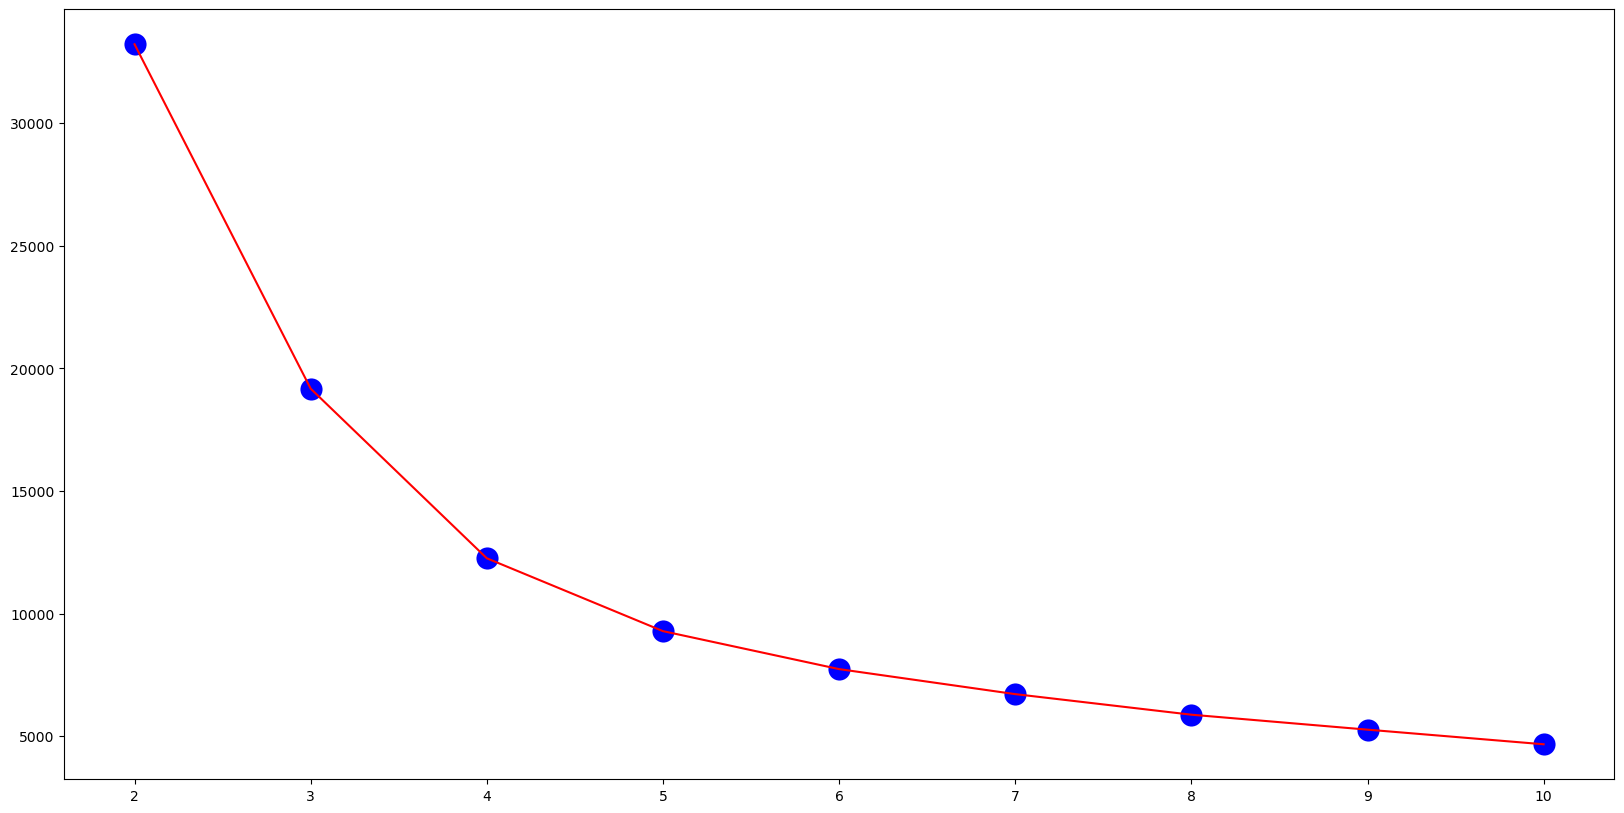

In [51]:
#Menentukan jumlah cluster

from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    clusteringK = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    clusteringK.fit(final_df)
    inertia.append(clusteringK.inertia_)

plt.figure(figsize=(20, 10))
sns.lineplot(x=range(2, 11), y=inertia, color='r')
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='b')
plt.show()

In [52]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0).fit(final_df)
    preds = kmeans.predict(final_df)
     
    score_euclidean = silhouette_score(final_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

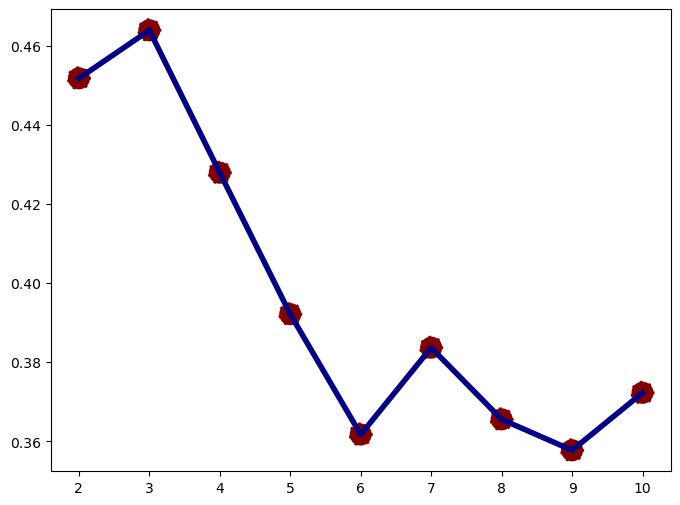

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

- Berdasarkan metode **Elbow** dan **Silhouette Score** di atas maka jumlah cluster yang akan di-assign adalah 3.

## Clustering II

In [55]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(final_df)
clusters = kmeans.labels_
new_df['clusters'] = clusters
new_df.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,...,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters
0,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,...,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50,0
1,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42.0,2014-03-31,140,...,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33,2
2,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,...,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26,2
3,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,...,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12,2
4,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,...,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39,0


In [56]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit(final_df)
pcs = pca.transform(final_df)
final_pca = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])
final_pca['clusters'] = clusters
final_pca.head()

,PC1,PC2,clusters
0,1.315706,-0.405127,0
1,2.881763,-0.314608,2
2,2.894159,-0.305132,2
3,2.002194,-0.131979,2
4,1.358402,-0.333696,0


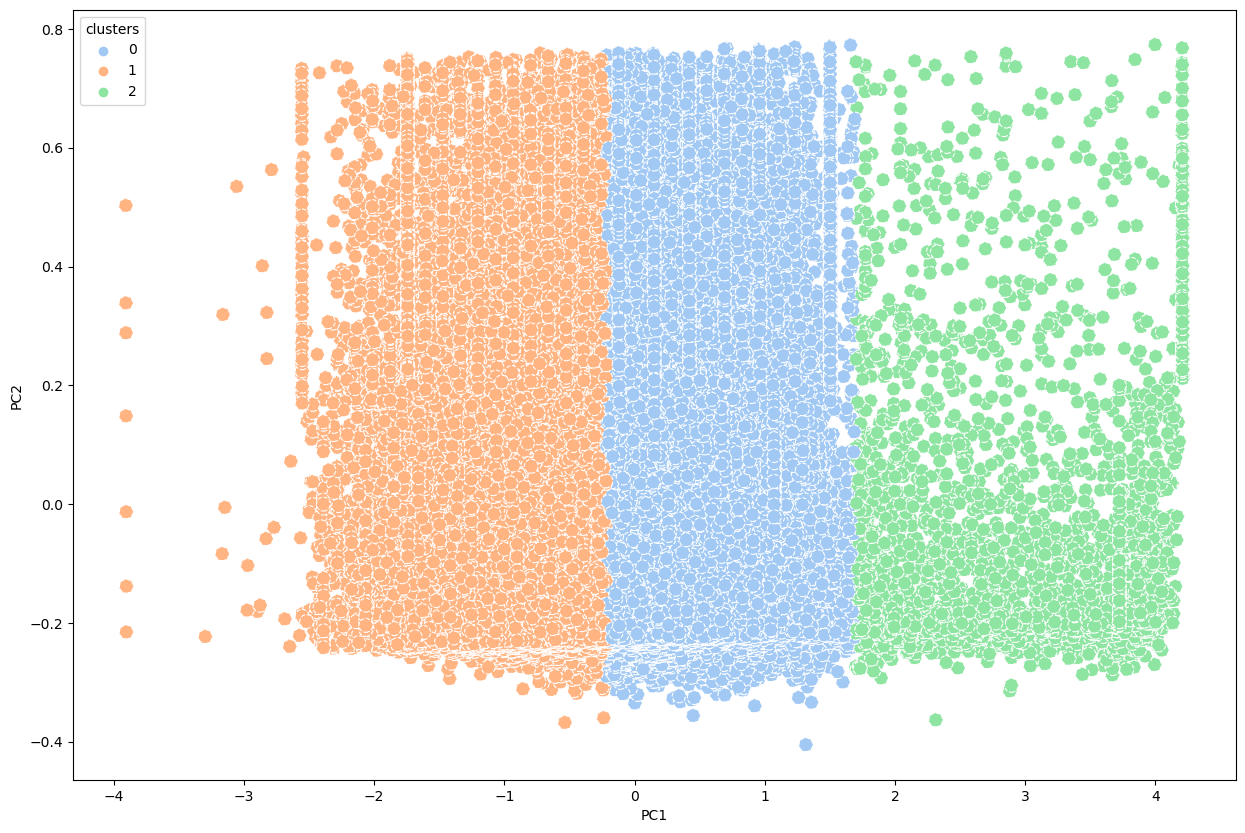

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2',hue='clusters',palette = 'pastel', linestyle= '--', s=100,data=final_pca,ax=ax)
plt.show()

In [58]:
new_df[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount','Points_Sum','clusters']].groupby('clusters').median()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,Points_Sum
clusters,,,,,
0,102.0,8.0,10864.0,0.781283,8168.0
1,114.0,6.0,9140.0,0.590000,4243.5
2,78.0,9.0,12885.0,1.274964,16220.0


In [59]:
new_df['clusters'].value_counts()

0    33363
1    25496
2     2575
Name: clusters, dtype: int64

1. Cluster 0 : 
- Merupakan member Tier tengah dengan akumulasi point ~8000.
- Merupakan member Tier tengah dengan rata-rata diskon di ~ 0.78
- Merupakan cluster dengan member paling banyak.
- Member dengan jarak penerbangan middle.
- Member dengan frekuensi penerbangan middle.

2. Cluster 1 :
- Merupakan member Tier rendah dengan akumulasi point ~4000
- Merupakan member penerbangan kelas rendah dengan rata-rata diskon di ~ 0.59 ()
- Merupakan cluster dengan member sedang.
- Member dengan jarak penerbangan paling rendah.
- Member dengan frekuensi penerbangan paling sedikit.

3. Cluster 2 :
- Merupakan member Tier atas dengan akumulasi point ~16000
- Merupakan member penerbangan kelas atas dengan rata-rata diskon di ~1.27
- Merupakan Cluster dengan member paling sedikit.
- Member dengan jarak penerbangan paling jauh.
- Member dengan frekuensi penerbangan paling banyak. 
     